# Experiment #1: Varying Intensity

For a copper-tin plasma, get the intensities for some lines. These intensities will be given 
a random variation and use these intensities to get the concentration back.

In [147]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use( 'ggplot' )

from pylibs.misc import stockElement
from pylibs.plasma import plasma
from pylibs.analysis import optimizePlasma, FIXED_DENSITY, FIXED_TEMPERATURE
from testing import loadlines

lnt = loadlines( "percistent_lines.txt" )

etree = [
            stockElement[ 'cu' ].copy(),
            stockElement[ 'sn' ].copy(),
        ]

for __elem in etree:
    __elem.setLines( lnt )

colour = { 'cu': 'tab:blue', 'sn': 'green' }


ctplasma = plasma( 'ctplasma', etree )

Using a copper-tin plasma with composition 70 : 30 and a set of selected lines at fixed temperature 
$T_e = 1~{\rm eV}$ and electron density $N_e = 10^{17}~{\rm cm}^{-3}$. Composition is in weight percentage.

In [193]:
p0 = ctplasma( 70.0, 30.0 )
p0.setup( 1.0, 1.0E+17 )

lnt = p0.lines

print( '{:=^3s} {:=^3s} {:=^12s} {:=^12s} {:=^12s} {:=^12s} {:=^12s}'.format( * [''] * 7 ) )
print( '{:^3s} {:^3s} {:^12s} {:^12s} {:^12s} {:^12s} {:^12s}'.format( 'X', 's', '\u03bb', 'Aki', 'Ek', 'gk', 'I' ) )
print( '{:=^3s} {:=^3s} {:=^12s} {:=^12s} {:=^12s} {:=^12s} {:=^12s}'.format( * [''] * 7 ) )
for i in range( lnt.nr ):
    print( '{4:3s} {5:^3d} {0:12.3f} {1:12.3e} {2:>12.3f} {3:^12.3g} {6:12.3e}'.format( *lnt.r(i) ) )
print( '{:=^3s} {:=^3s} {:=^12s} {:=^12s} {:=^12s} {:=^12s} {:=^12s}'.format( * [''] * 7 ) )

I0 = lnt.I.copy()

=== === ============ ============ ============ ============ ============
 X   s       λ           Aki           Ek           gk           I      
=== === ============ ============ ============ ============ ============
cu   0       510.555    2.000e+06        3.817      4          5.662e+03
cu   0       515.324    6.000e+07        6.191      4          1.566e+04
cu   0       521.820    7.500e+07        6.192      6          2.898e+04
sn   0       303.411    2.000e+08        4.295      1          1.151e+04
sn   0       317.503    1.000e+08        4.329      3          1.595e+04
sn   0       326.233    2.700e+08        4.867      3          2.447e+04
sn   0       452.473    2.600e+07        4.867      3          1.699e+03
sn   1       335.195    1.820e+08       11.070      8          3.365e+03
sn   1       645.354    7.000e+07        8.974      4          2.735e+03
=== === ============ ============ ============ ============ ============


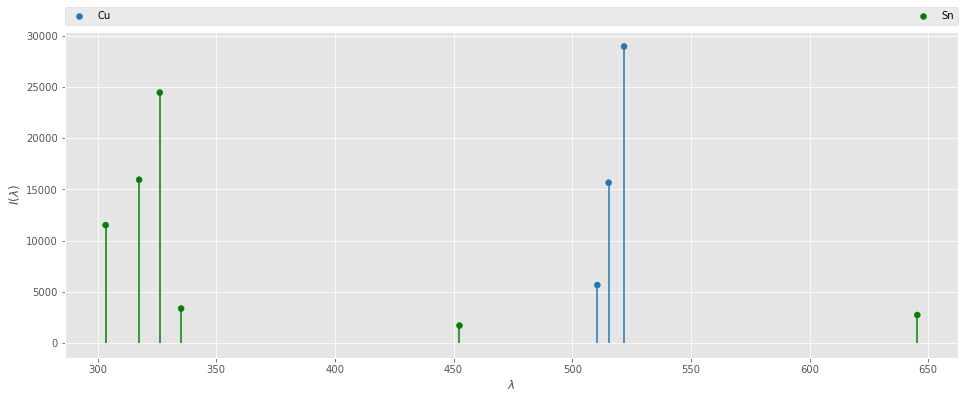

In [239]:

fig, ax1 = plt.subplots(1, 1, figsize = [16, 6])

c = np.array([ colour[x] for x in lnt.elem ])

# original intensity
ax1.scatter( lnt.wavelen, I0, c = c, zorder = 2 )
ax1.vlines( lnt.wavelen, 0.0, I0, colors = c)

ax1.scatter([], [], c = colour['cu'], label = 'Cu')
ax1.scatter([], [], c = colour['sn'], label = 'Sn')

ax1.legend(
                bbox_to_anchor = (0.0, 1.02, 1.0, 0.102),
                loc = 'lower left', ncol = 2,
                mode = 'expand', borderaxespad = 0,
          )
ax1.set( xlabel = '$\\lambda$', ylabel = '$I(\\lambda)$' )

plt.show()

In [256]:
def f1(nsamples: int, maxvar: float) -> list:
    
    def _expt(i: int) -> float:
        r = np.random.normal() * maxvar
        lnt.setLineIntensity( I0 * ( 1 + r ) )
        
        p1 = ctplasma( 50.0, 50.0 )
        p1.setup( 1.0, 1.0E+17 )
        p1.lock()

        optimizePlasma( lnt, p1, FIXED_DENSITY | FIXED_TEMPERATURE )

        return p1.composition[ 'cu' ]

    return np.asfarray(
                            list(
                                    map(
                                            _expt, range( nsamples )
                                       )
                                )
                        )

In [267]:
c10pt = f1( 500, 0.1 )
c20pt = f1( 500, 0.2 )

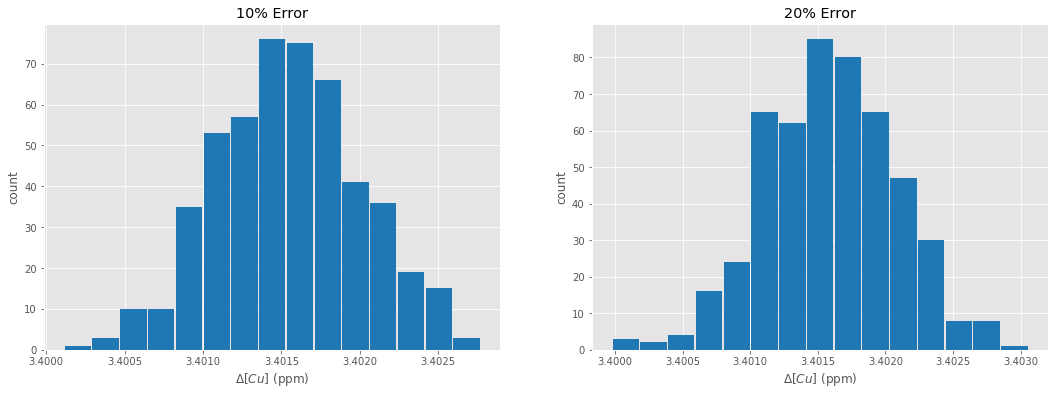

In [268]:
fig, (ax, ax1) = plt.subplots( 1, 2, figsize = [18, 6] )

ax.hist( 
            ( c10pt / p0.composition[ 'cu' ] - 1 ) * 1E+6, 
            bins   = 15, 
            rwidth = 0.95,
            color  = colour[ 'cu' ],
       )
ax.set( xlabel = '$\\Delta [Cu]$ (ppm)', ylabel = 'count', title = '10% Error' )

ax1.hist( 
            ( c20pt / p0.composition[ 'cu' ] - 1 ) * 1E+6, 
            bins   = 15, 
            rwidth = 0.95,
            color  = colour[ 'cu' ],
        )
ax1.set( xlabel = '$\\Delta [Cu]$ (ppm)', ylabel = 'count', title = '20% Error' )

plt.show()